In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#7.2 Select only SN that have been observed long enough (see Table 1 below).
#SN definations to work with
SN = ["2004ef", "2004eo", "2004ey", "2005M", "2005hc", "2005iq", "2005kc", "2006X", 
      "2006ax", "2006bh", "2007af", "2007le", "2007on", "2008bc", "2008fp", "2008gp", "2008hv"]
zCMB = [0.0298, 0.0147, 0.0146, 0.0230, 0.0450, 0.0329, 0.0139, 0.0063, 0.0179, 
        0.0105, 0.0063, 0.0055, 0.0062, 0.0157, 0.0063, 0.0328, 0.0136]
s = [0.89, 0.87, 1.14, 1.15, 1.14, 0.93, 0.98, 1.01, 
     1.12, 0.86, 1.01, 1.12, 0.62, 1.20, 1.18, 1.07, 0.97]

In [4]:
def process_supernova_file(file_name):
    """
    Process a supernova data file to extract time (MJD) and magnitude (-B-band).
    
    Parameters:
    - file_name (str): The name of the supernova data file.
    
    Returns:
    - x (numpy.ndarray): Array of time (MJD).
    - y (numpy.ndarray): Array of magnitude (-B-band).
    """
    data = []
    with open(file_name, 'r') as f:
        for line in f:
            # Skip comments and invalid lines
            if line.startswith('#'):
                continue
            
            # Split the line into columns and filter out invalid measurements (99.90)
            values = line.split()
            if len(values) >= 4 and float(values[3]) != 99.90:
                try:
                    mjd = float(values[0])  # MJD (time)
                    magnitude_b = float(values[3])  # B-band magnitude
                    data.append((mjd, -magnitude_b))  # Negate magnitude for y
                except ValueError:
                    continue  # Skip rows with invalid data
    
    # Convert list to numpy arrays for x (time) and y (magnitude)
    data_array = np.array(data)
    if data_array.size == 0:
        return np.array([]), np.array([])
    
    x, y = data_array[:, 0], data_array[:, 1]
    return x, y

# process_supernova_file("./CSP_Photometry_DR2/SN2004efopt+nir_photo.dat")[1]



In [18]:
process_supernova_file("./CSP_Photometry_DR2/SN2004efopt+nir_photo.dat")[1]

array([-17.981, -17.754, -17.558, -17.419, -17.279, -17.188, -17.117,
       -17.086, -17.064, -17.058, -17.09 , -17.111, -17.154, -17.222,
       -17.322, -17.384, -17.48 , -17.587, -17.713, -17.822, -17.933,
       -18.099, -18.194, -18.324, -18.497, -18.617, -18.75 , -19.353,
       -19.564, -19.633, -19.71 , -19.812, -19.904, -19.941, -20.123,
       -20.119, -20.231, -20.096, -20.328, -20.451, -20.622])

Text(0, 0.5, 'Magnitude')

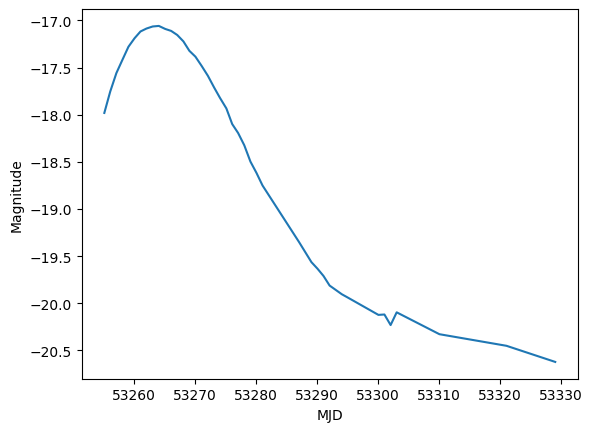

In [11]:
#7.2 d
plt.plot(process_supernova_file("./CSP_Photometry_DR2/SN2004efopt+nir_photo.dat")[0],
        process_supernova_file("./CSP_Photometry_DR2/SN2004efopt+nir_photo.dat")[1])
plt.xlabel("MJD")
plt.ylabel("Magnitude")

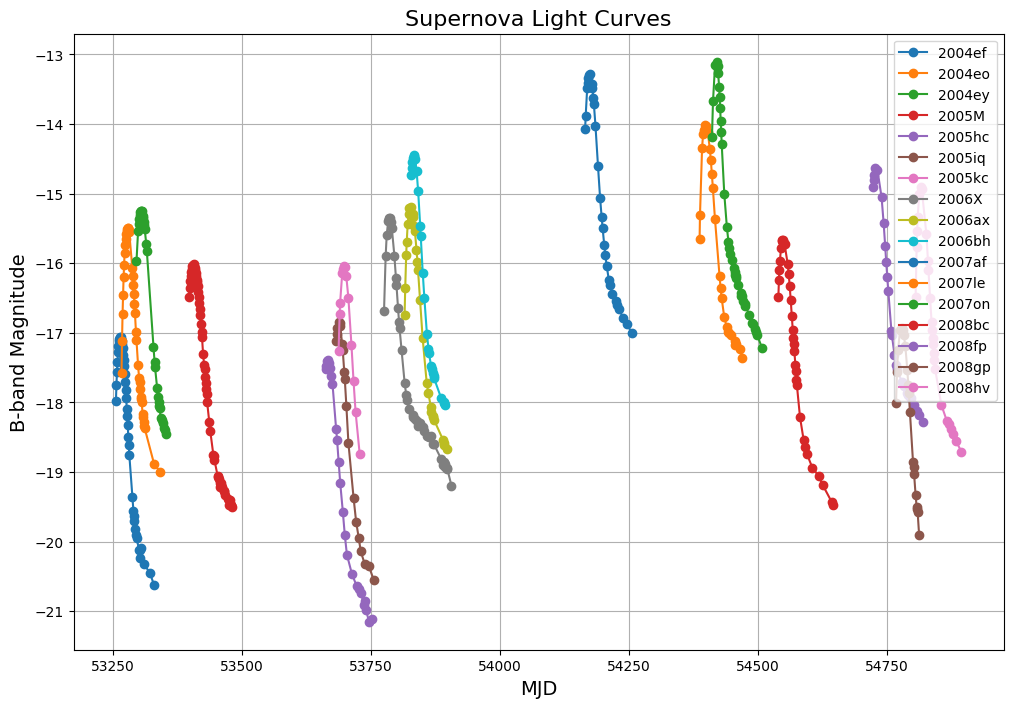

In [16]:
# 7a
def plot_all_supernovae(sn_array, base_path="CSP_Photometry_DR2/"):
    """
    Plot light curves of all supernovae from the given array.
    
    Parameters:
    - sn_array (list): List of supernova names.
    - base_path (str): Path to the directory containing data files.
    """
    plt.figure(figsize=(12, 8))
    
    for sn_name in sn_array:
        file_name = f"{base_path}SN{sn_name}opt+nir_photo.dat"
        x, y = process_supernova_file(file_name)
        
        if x.size > 0 and y.size > 0:
            plt.plot(x, y, marker='o', linestyle='-', label=sn_name)
        else:
            print(f"Warning: No valid data for supernova {sn_name}")

    plt.xlabel("MJD", fontsize=14)
    plt.ylabel("B-band Magnitude", fontsize=14)
    plt.title("Supernova Light Curves", fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=10, loc="upper right")
    plt.show()

plot_all_supernovae(SN)

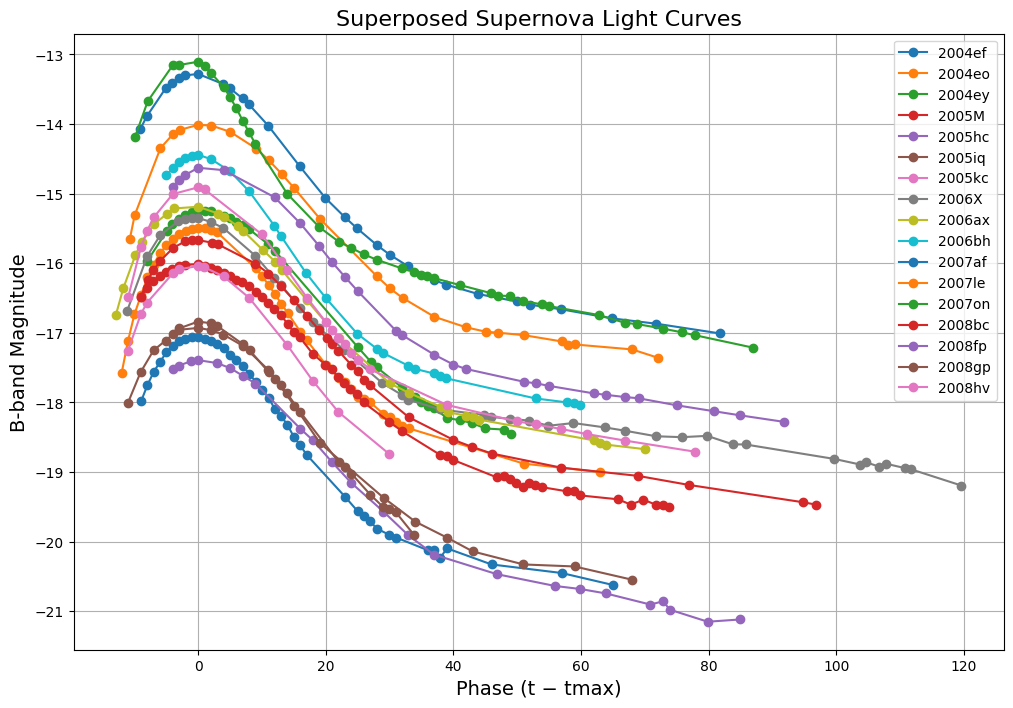

In [19]:
#7.3b
def plot_superposed_supernovae(sn_array, base_path="CSP_Photometry_DR2/"):
    """
    Plot supernova light curves superposed at their peak brightness.
    
    Parameters:
    - sn_array (list): List of supernova names.
    - base_path (str): Path to the directory containing data files.
    """
    plt.figure(figsize=(12, 8))
    
    for sn_name in sn_array:
        file_name = f"{base_path}SN{sn_name}opt+nir_photo.dat"
        x, y = process_supernova_file(file_name)
        
        if x.size > 0 and y.size > 0:
            # Find the time of maximum brightness (minimum magnitude)
            tmax = x[np.argmax(y)]
            phase = x - tmax  # Compute the phase (t - tmax)
            
            plt.plot(phase, y, marker='o', linestyle='-', label=sn_name)
        else:
            print(f"Warning: No valid data for supernova {sn_name}")

    plt.xlabel("Phase (t − tmax)", fontsize=14)
    plt.ylabel("B-band Magnitude", fontsize=14)
    plt.title("Superposed Supernova Light Curves", fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=10, loc="upper right")
    plt.show()


plot_superposed_supernovae(SN)


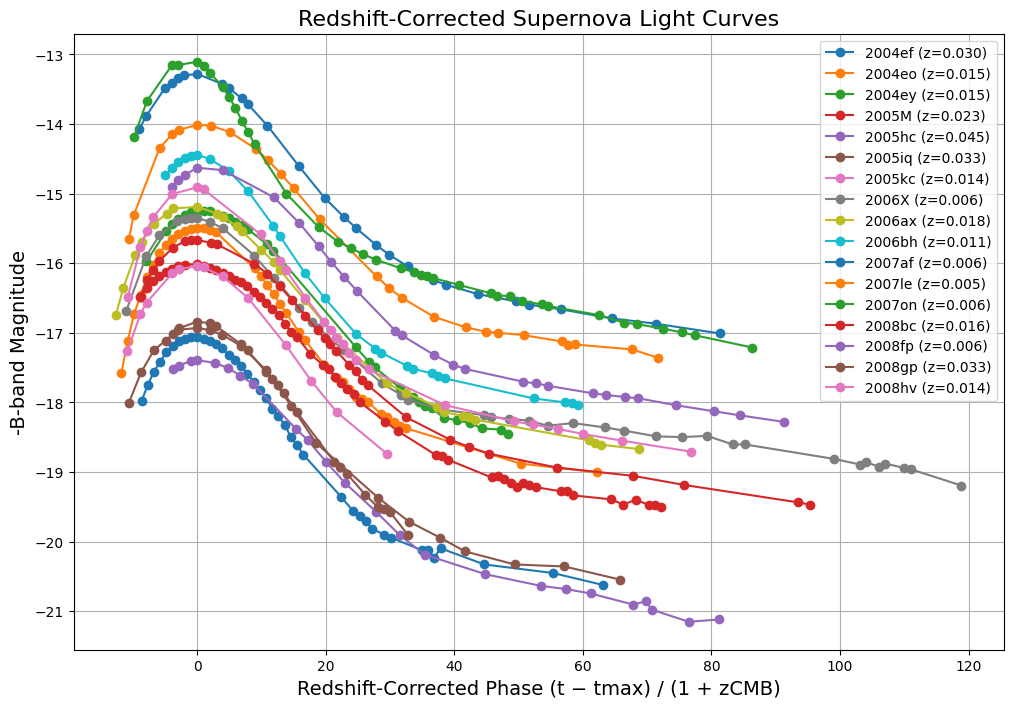

In [20]:
#7.3c
def plot_redshift_corrected_supernovae(sn_array, zcmb_array, base_path="CSP_Photometry_DR2/"):
    """
    Plot supernova light curves superposed at their peak brightness and corrected for redshift effects.
    
    Parameters:
    - sn_array (list): List of supernova names.
    - zcmb_array (list): List of redshift (zCMB) values corresponding to the supernovae.
    - base_path (str): Path to the directory containing data files.
    """
    plt.figure(figsize=(12, 8))
    
    for sn_name, zcmb in zip(sn_array, zcmb_array):
        file_name = f"{base_path}SN{sn_name}opt+nir_photo.dat"
        x, y = process_supernova_file(file_name)
        
        if x.size > 0 and y.size > 0:
            # Find the time of maximum brightness (minimum magnitude)
            tmax = x[np.argmax(y)]
            phase = (x - tmax) / (1 + zcmb)  # Correct the phase for redshift
            
            plt.plot(phase, y, marker='o', linestyle='-', label=f"{sn_name} (z={zcmb:.3f})")
        else:
            print(f"Warning: No valid data for supernova {sn_name}")

    plt.xlabel("Redshift-Corrected Phase (t − tmax) / (1 + zCMB)", fontsize=14)
    plt.ylabel("-B-band Magnitude", fontsize=14)
    plt.title("Redshift-Corrected Supernova Light Curves", fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=10, loc="upper right")
    plt.show()


plot_redshift_corrected_supernovae(SN, zCMB)

In [23]:
#7.3d
#first calculate the mean value of all peaks:
def calculate_mean_peak(sn_array, base_path="CSP_Photometry_DR2/"):
    """
    Calculate the mean value of the peaks (maximum brightness) for all supernovae.
    
    Parameters:
    - sn_array (list): List of supernova names.
    - base_path (str): Path to the directory containing data files.
    
    Returns:
    - mean_peak (float): The mean value of all valid peaks.
    """
    peaks = []

    for sn_name in sn_array:
        file_name = f"{base_path}SN{sn_name}opt+nir_photo.dat"
        _, y = process_supernova_file(file_name)
        
        if y.size > 0:
            peak = max(y)  # Negated magnitudes make the peak the maximum
            peaks.append(peak)
        else:
            print(f"Warning: No valid data for supernova {sn_name}")
    
    # Calculate mean, ignoring invalid peaks
    if len(peaks) > 0:
        mean_peak = np.mean(peaks)
    else:
        mean_peak = None

    return mean_peak

mean_peak = calculate_mean_peak(SN)
print("Mean peak value:", mean_peak)


Mean peak value: -15.386882352941177


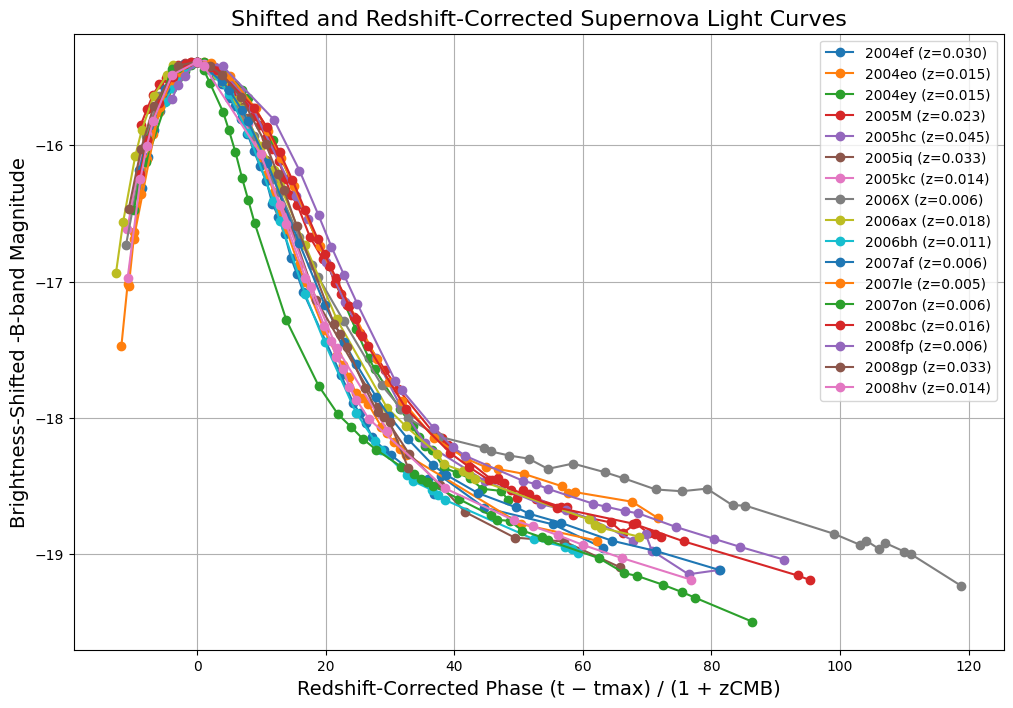

In [25]:
7.3e
def plot_shifted_supernovae(sn_array, zcmb_array, mean_peak, base_path="CSP_Photometry_DR2/"):
    """
    Plot supernova light curves with redshift-corrected phase (x-axis) and brightness-shifted (y-axis)
    to align all peaks at the mean peak value.
    
    Parameters:
    - sn_array (list): List of supernova names.
    - zcmb_array (list): List of redshift (zCMB) values corresponding to the supernovae.
    - mean_peak (float): The mean peak value to align all supernovae.
    - base_path (str): Path to the directory containing data files.
    """
    plt.figure(figsize=(12, 8))
    
    for sn_name, zcmb in zip(sn_array, zcmb_array):
        file_name = f"{base_path}SN{sn_name}opt+nir_photo.dat"
        x, y = process_supernova_file(file_name)
        
        if x.size > 0 and y.size > 0:
            # Correct time for redshift
            tmax = x[np.argmax(y)]  # Find tmax as the time of maximum brightness
            phase = (x - tmax) / (1 + zcmb)
            
            # Calculate the peak value and shift to align with the mean peak
            peak = max(y)  # Negated magnitudes make the peak the maximum
            y_shifted = y + (mean_peak - peak)
            
            # Plot the corrected curve
            plt.plot(phase, y_shifted, marker='o', linestyle='-', label=f"{sn_name} (z={zcmb:.3f})")
        else:
            print(f"Warning: No valid data for supernova {sn_name}")

    plt.xlabel("Redshift-Corrected Phase (t − tmax) / (1 + zCMB)", fontsize=14)
    plt.ylabel("Brightness-Shifted -B-band Magnitude", fontsize=14)
    plt.title("Shifted and Redshift-Corrected Supernova Light Curves", fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=10, loc="upper right")
    plt.show()

plot_shifted_supernovae(SN, zCMB, mean_peak)

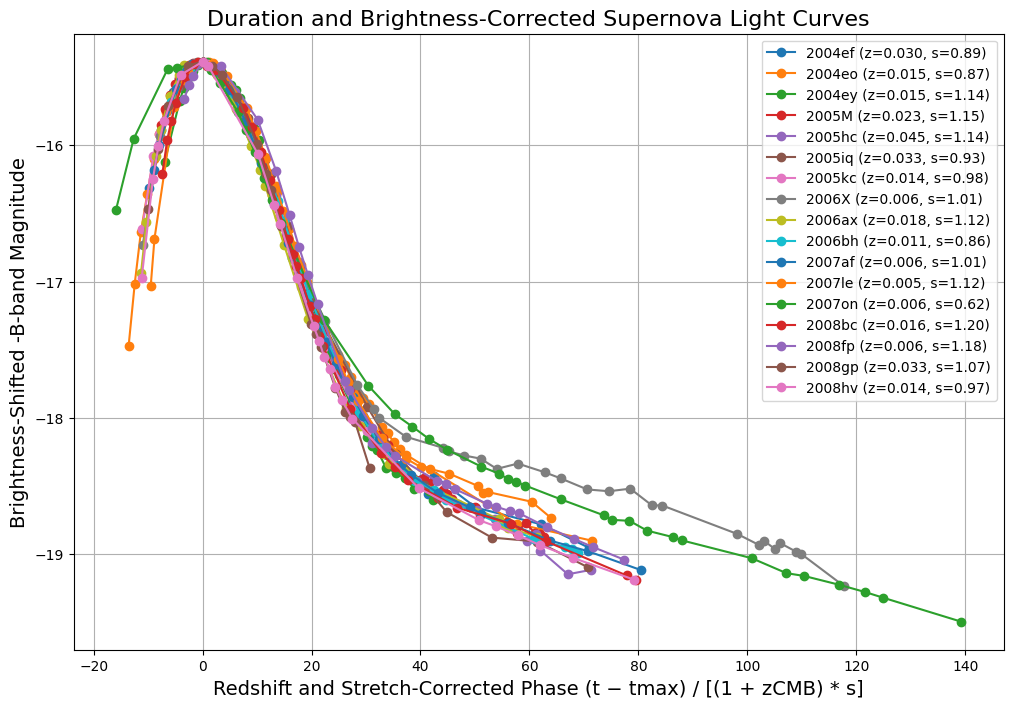

In [27]:
def plot_duration_and_brightness_corrected_supernovae(sn_array, zcmb_array, stretch_factors, mean_peak, base_path="CSP_Photometry_DR2/"):
    """
    Plot supernova light curves with redshift-corrected phase divided by the stretch factor (x-axis),
    and brightness-shifted (y-axis) to align all peaks at the mean peak value.
    
    Parameters:
    - sn_array (list): List of supernova names.
    - zcmb_array (list): List of redshift (zCMB) values corresponding to the supernovae.
    - stretch_factors (list): List of stretch factors (s) corresponding to the supernovae.
    - mean_peak (float): The mean peak value to align all supernovae.
    - base_path (str): Path to the directory containing data files.
    """
    plt.figure(figsize=(12, 8))
    
    for sn_name, zcmb, s in zip(sn_array, zcmb_array, stretch_factors):
        file_name = f"{base_path}SN{sn_name}opt+nir_photo.dat"
        x, y = process_supernova_file(file_name)
        
        if x.size > 0 and y.size > 0:
            # Correct time for redshift and stretch factor
            tmax = x[np.argmax(y)]  # Find tmax as the time of maximum brightness
            phase = (x - tmax) / (1 + zcmb) / s  # Redshift and stretch corrected phase
            
            # Calculate the peak value and shift to align with the mean peak
            peak = max(y)  # Negated magnitudes make the peak the maximum
            y_shifted = y + (mean_peak - peak)
            
            # Plot the corrected curve
            plt.plot(phase, y_shifted, marker='o', linestyle='-', label=f"{sn_name} (z={zcmb:.3f}, s={s:.2f})")
        else:
            print(f"Warning: No valid data for supernova {sn_name}")

    plt.xlabel("Redshift and Stretch-Corrected Phase (t − tmax) / [(1 + zCMB) * s]", fontsize=14)
    plt.ylabel("Brightness-Shifted -B-band Magnitude", fontsize=14)
    plt.title("Duration and Brightness-Corrected Supernova Light Curves", fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=10, loc="upper right")
    plt.show()

plot_duration_and_brightness_corrected_supernovae(SN, zCMB, s, mean_peak)
